# Sample Size - Two Sample one-sided z-test

Example

1. One Side

$
\begin{aligned}
&H_0 : \mu \leq 0 \\
&H_a : \mu > \theta
\end{aligned}
$ or $
\begin{aligned}
&H_0 : \mu \geq 0 \\
&H_a : \mu < \theta
\end{aligned}
$

2. Two Side

$
\begin{aligned}
&H_0 : \mu = 0 \\
&H_a : \mu \not = \theta
\end{aligned}
$

|Null hypothesis is|True|False|
|-|-|-|
|Rejected| Type I Error <br> False Positive <br> Probability = $\alpha$| Correct Decision <br> Power <br> True Positive <br> Probability = 1- $\beta$|
|Not Rejected| Correct Decision <br> True Negative <br> Probability = 1- $\alpha$ | Type II Error <br> False Negative <br> Probability = $\beta$|

## Level 0 - Equation

$$
N \geq \frac{\sigma^2(Z_{1-\alpha}+Z_{1-\beta})^2}{\delta}
$$

where,
- N: minimum required sample size
- Significance Level, type I error, false positive: $\alpha$
- Type II error, false negative: $\beta$
- Power: $1-\beta$
- Minimum detectable effect: $\delta$

## Level X - Deduction using Chart

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_theme()

(0.0, 536.55)

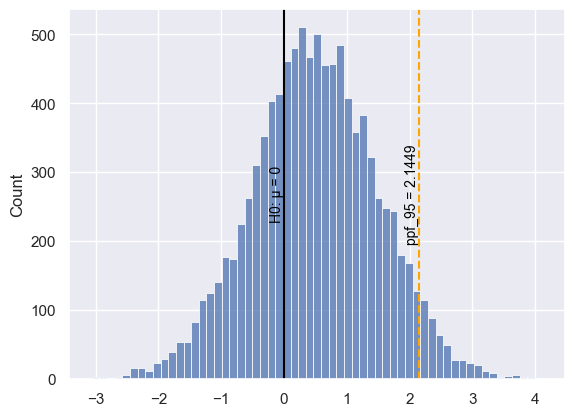

In [ ]:
# Test One Sample X Fixed value
### Example
# X ~ N(0.5,1)
# H0: X=0
# H1: X>0

mean = 0.5
stddev = 1
size = 10000
X = np.random.normal(loc=mean, scale=stddev, size=size)
H1 = 0


# Plot Distribution
_, ax = plt.subplots()
sns.histplot(X, ax=ax)
ymin, ymax = ax.get_ylim()
# Hypothesis line
plt.vlines(x=H1, ymin=ymin, ymax=ymax, color='black')
text_x = H1
text_y = (ymin + ymax) / 2
plt.text(
    text_x, text_y, f'H0: μ = {H1}', color='black', rotation=90,
    ha='right', va='center', fontsize=10
)


# Plot Hypotesis Test Tail
y = stats.norm.ppf(0.95, loc=mean, scale=stddev)
plt.vlines(x=y, ymin=ymin, ymax=ymax, color='orange', linestyles='--')
plt.text(
    y, text_y, f'ppf_95 = {y:.4f}', color='black', rotation=90,
    ha='right', va='center', fontsize=10
)

ax.set_ylim(ymin, ymax)

# Calculate p-value
# Given H0 is true


In [ ]:
# Error type I
# P(X>x|H_0) < P(X>x_c|H_0)


## Level X - Deduction using equation

*Naive approche*

- Type I error should be lower than $\alpha$
- Type I error $= P(\text{reject } H_0 | H_0 \text{ is true})$


$$
\begin{align*}
P(X_d \geq x_d | H_0 \text{ is true}) &\leq P(X_d \geq x_{\text{crit}} | H_0 \text{ is true})\\
P(X_d \geq x_d | H_0 \text{ is true}) &\leq \alpha
\end{align*}
$$

$$
X_d \sim N(\mu, \frac{\sigma^2}{N}) \text{ (central limit theorem)}
$$

$$
\begin{align*}
P(X_d \geq x_d | H_0 \text{ is true}) &= P(\frac{X_d - \mu_{X_d}}{\sigma_{X_d}} \geq \frac{x_d - \mu_{X_d}}{\sigma_{X_d}})\\
&= P(Z \geq \frac{x_d - \mu}{\sqrt{\frac{\sigma^2}{N}}}), H_0: \mu = 0 \\
&= P(Z \geq z_{x_d|H_0}) \\
P(Z \geq z_{x_d|H_0}) &\leq \alpha \\
\frac{x_d - \mu}{\sqrt{\frac{\sigma^2}{N}}} &\geq z_{1-\alpha} \\
N &\geq \frac{\sigma^2z_{1-\alpha}^2}{x_d^2}
\end{align*}
$$


- In order to control type II error, it should be lower than $\beta$, we considering that the test should have the power to reject corretly the null hypothesis with probability great or equal to $1-\beta$

$$
\begin{align*}
P(\text{reject } H_0 | H_0\text{ is false}) &\geq 1 - \beta \\
P(\text{reject } H_0 | H_0\text{ is false}) &= P(X_d > x_c) \\
&= P(\frac{X_d - \mu}{\sigma} > z_{1-\alpha}) \\
&= P(Z > \frac{ \sigma * z_{1-\alpha} - \mu}{\sigma}) \\
&= P(Z > z_{1-\alpha} - \frac{\mu}{\sigma}) \\

P(Z > z_{1-\alpha} - \frac{\mu}{\sigma}) &\geq 1 - \beta; \text{CDF: } \phi(z) = P(Z \leq z) \\
1- \phi(z_{1-\alpha} - \frac{\mu}{\sigma}) &\geq 1 - \phi(-z_{\beta}) \\
z_{1-\alpha} - \frac{\mu}{\sigma} &\geq -z_{\beta}; \mu = \mu_2 - \mu_1; \sigma = \sqrt{\frac{\sigma^2}{N}} \\
z_{1-\alpha} - \frac{\mu}{\sqrt{\frac{\sigma^2}{N}}} &\geq -z_{\beta} \\
N &\geq \frac{\sigma^2(Z_{1-\alpha}+Z_{1-\beta})^2}{\mu}
\end{align*}
$$